# TF-IDF

La medida de TF-IDF (_term frequency-inverse document frequency_) le asigna un valor numérico a cada palabra en un documento, en contraste con otro/s documento/s.

Esta medida tiene en cuenta:
- la cantidad de documentos considerados
- la cantidad total de palabras considerando todos los documentos
- la aparición de cada término en dichos dcumentos (si un término aparece en todos los documentos, quizá no sea distintivo de ninguno)
- la cantidad de veces que cada término aparece en cada documento (no es lo mismo que un término aparezca mucho en un documento y muy poco en otro, probablemente en ese caso sea distintivo del primer documento pero no del segundo)

Así, por ejemplo, es de esperar que las palabras vacías de contenido (_de_, _la/s_, _lo/s_) no reciban un gran valor de tf-idf en ningún documento comparado, puesto que seguramente aparezcan de manera frecuente en todos ellos.

En cambio si, por ejemplo, estamos comparando recetas de cocina y noticias periodísitcas, es de esperar que palabras como _harina_, _azúcar_ o _huevos_ reciban un alto tf-idf en el primer caso, mientas que en el segundo lo tendrán palabras como _economía_, _gobierno_, _accidente_. Esto ocurre porque el primer conjunto de palabras seguramente aparezca muchas veces en las recetas y ninguna (o casi ninguna) en las noticias, lo que lo hará distintivo de aquellas. Y lo análogo ocurrirá con el conjunto de palabras distintivo de noticias.

Cabe aclarar que, en este ejemplo, consideramos documento al conjunto de recetas, por un lado, y al conjunto de noticias, por otro. De modo que obtenemos el tf-idf para recetas y noticias en general.

Obviamente, si el interés fuese comparar distintos tipos de noticias (sobre economía, sociedad, etc.) para evaluar qué palabras resultan más relevantes en cada caso, los documentos estarán constituidos por cada conjunto de noticias referidas a un tópico específico.

Qué consituye un documento será una labor a determinar en cada caso según qué comparación se desee establecer.

**Tabla de contenidos**

   1. [Sklearn](#1.-Sklearn)
   2. [Detrás de cámaras](#2.-Detrás-de-cámaras)
   3. [Variaciones](#3.-Variaciones)
   4. [Comparación gráfica](#4.-Comparación-gráfica)
   5. [Otros parámetros](#5.-Otros-parámetros)
   6. [Funciones relacionadas](#6.-Funciones-relacionadas)

## 1. Sklearn

Una forma de calcular el tf-idf es utilizando el vectorizador que ofrece la libería [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer).

A continuación, se propone un ejemplo que será el que se utilizará en toda la guía.

In [1]:
corpus = [
    'este es el primer documento',
    'este documento es el segundo documento',
    'esto es el tercer documento',
    'esto no es el cuarto documento',
    'dejame atravesar el viento sin documento'
]

Se instancia la clase `TfidfVectorizar` y, con el método `fit_transform` se lo ajusta y se realiza la tranformación con las oraciones en nuestro corpus.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.        , 0.        , 0.30615553, 0.30615553,
        0.36197428, 0.51836637, 0.        , 0.        , 0.64250176,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.54095946, 0.27047973,
        0.31979401, 0.45796199, 0.        , 0.        , 0.        ,
        0.56763208, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.30615553, 0.30615553,
        0.36197428, 0.        , 0.51836637, 0.        , 0.        ,
        0.        , 0.        , 0.64250176, 0.        ],
       [0.        , 0.54054601, 0.        , 0.25757307, 0.25757307,
        0.3045342 , 0.        , 0.43610912, 0.54054601, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.47382645, 0.        , 0.47382645, 0.22578084, 0.22578084,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.47382645, 0.        , 0.47382645]])

Con el método `get_feature_names`podemos acceder a los features con los que se ajustó el vectorizador. En este caso, las palabras de nuestro corpus.

In [3]:
tfidf_vectorizer.get_feature_names()

['atravesar',
 'cuarto',
 'dejame',
 'documento',
 'el',
 'es',
 'este',
 'esto',
 'no',
 'primer',
 'segundo',
 'sin',
 'tercer',
 'viento']

Para una mejor visualización, generamos un dataframe con los valores obtenidos.

In [4]:
import pandas as pd

tfidf_sklearn = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=corpus)
tfidf_sklearn

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.540959,0.270480,0.319794,0.457962,0.000000,0.000000,0.000000,0.567632,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


## 2. Detrás de cámaras

Ahora bien, ¿qué cálculo realiza sklearn para obtener el tf-idf?

A continuación, realizaremos paso a paso el cálculo detallado en la [documentación de la librería](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting) y veremos que existe más de una forma posible de obtener la medida de tf-idf.

En principio, la fórmula se define del siguiente modo:

$$
\text{Sea t un término y d un documento}
$$
$$
$$
$$
\text{tf-idf(t, d)} = \text{tf(t,d) x idf(t)}
$$
$$
$$
$$
\text{tf(t,d)}= \text{frecuencia absoluta de t en d} = \text{cantidad de veces que un término aparece en un documento}
$$

Lo que varía en cada caso es la definición de cómo obtener el idf(t). Cuando se calcula sin suavizado (`smooth_idf=False`), como lo realizamos anteriormente, la fórmula utilizada es:

$$
\text{idf(t)} = \log\left(\frac{n+1}{df(t)+1}\right)+1\\
$$
$$
$$
$$
\text{donde}\\
n = \text{cantidad total de documentos}\\
\text{df(t)} = \text{cantidad de documentos en los que aparece el término t}
$$

Un detalle no menor es que sklearn realiza también una normalización sobre los valores obtenidos al multiplicar _tf x idf_. Por defecto, la normalización que se utiliza es la _l2_ o también conocida como _normalización euclideana_. Otra opción es usar la _l1_.

Veamos el cálculo paso a paso.

### 2.1. tf(t,d)

Primero que nada, obtenemos el vocabulario y la frecuencia absoluta de cada palabra en cada documento, esto es: cuántas veces aparece cada palabra en cada documento. 

Esta información se puede extraer de varias maneras. Una de ellas es utilizar la clase [`FreqDist` de nltk](https://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist).

Aquí lo haremos de forma más rudimentaria de modo que se pueda ver claramente qué hacemos en cada momento.

Entonces, para obtener el vocabulario, convertimos cada oración del corpus en una lista de palabras. Así, antes teníamos una lista de _strings_. Ahora tendremos una lista de listas.

In [5]:
doc_list = [sent.split() for sent in corpus]
doc_list

[['este', 'es', 'el', 'primer', 'documento'],
 ['este', 'documento', 'es', 'el', 'segundo', 'documento'],
 ['esto', 'es', 'el', 'tercer', 'documento'],
 ['esto', 'no', 'es', 'el', 'cuarto', 'documento'],
 ['dejame', 'atravesar', 'el', 'viento', 'sin', 'documento']]

Luego, concatenamos todas las listas, de modo que me queda una única lista que contenga todas las palabras del corpus.

In [6]:
from itertools import chain

words_list = list(chain(*doc_list))
print(words_list)

['este', 'es', 'el', 'primer', 'documento', 'este', 'documento', 'es', 'el', 'segundo', 'documento', 'esto', 'es', 'el', 'tercer', 'documento', 'esto', 'no', 'es', 'el', 'cuarto', 'documento', 'dejame', 'atravesar', 'el', 'viento', 'sin', 'documento']


Y nos quedamos con las palabras únicas. Este será nuestro vocabulario.

In [7]:
vocabulary = list(set(words_list))
print(vocabulary)

['dejame', 'tercer', 'segundo', 'viento', 'cuarto', 'es', 'no', 'atravesar', 'este', 'esto', 'primer', 'sin', 'documento', 'el']


Contamos, para cada documento y cada palabra en el vocabulario, cuántas veces aparece esa palabra en ese documento. Para esto, utilizamos el método `count`, que permite contar cuántas veces aparece un elemento en una lista.

Almacenamos esta información en un diccionario.

In [8]:
freq_abs = dict()
for doc in corpus:
    freq_abs[doc] = dict()
    for word in vocabulary:
        doc_as_list = doc.split()
        freq_abs[doc][word] = doc_as_list.count(word)
        
print(freq_abs)

{'este es el primer documento': {'dejame': 0, 'tercer': 0, 'segundo': 0, 'viento': 0, 'cuarto': 0, 'es': 1, 'no': 0, 'atravesar': 0, 'este': 1, 'esto': 0, 'primer': 1, 'sin': 0, 'documento': 1, 'el': 1}, 'este documento es el segundo documento': {'dejame': 0, 'tercer': 0, 'segundo': 1, 'viento': 0, 'cuarto': 0, 'es': 1, 'no': 0, 'atravesar': 0, 'este': 1, 'esto': 0, 'primer': 0, 'sin': 0, 'documento': 2, 'el': 1}, 'esto es el tercer documento': {'dejame': 0, 'tercer': 1, 'segundo': 0, 'viento': 0, 'cuarto': 0, 'es': 1, 'no': 0, 'atravesar': 0, 'este': 0, 'esto': 1, 'primer': 0, 'sin': 0, 'documento': 1, 'el': 1}, 'esto no es el cuarto documento': {'dejame': 0, 'tercer': 0, 'segundo': 0, 'viento': 0, 'cuarto': 1, 'es': 1, 'no': 1, 'atravesar': 0, 'este': 0, 'esto': 1, 'primer': 0, 'sin': 0, 'documento': 1, 'el': 1}, 'dejame atravesar el viento sin documento': {'dejame': 1, 'tercer': 0, 'segundo': 0, 'viento': 1, 'cuarto': 0, 'es': 0, 'no': 0, 'atravesar': 1, 'este': 0, 'esto': 0, 'prime

Pasamos esta información a un dataframe, a un formato que luego nos sea sencillo de manipular e ir viendo los cambios paso a paso.

In [9]:
df = (
    pd
    .DataFrame.from_dict(freq_abs)
    .melt(var_name='doc',value_name='tf',ignore_index=False)
    .reset_index()
    .rename(columns={'index':'word'})
)[['doc','word','tf']]
df.head(10)

,doc,word,tf
0,este es el primer documento,dejame,0
1,este es el primer documento,tercer,0
2,este es el primer documento,segundo,0
3,este es el primer documento,viento,0
4,este es el primer documento,cuarto,0
5,este es el primer documento,es,1
6,este es el primer documento,no,0
7,este es el primer documento,atravesar,0
8,este es el primer documento,este,1
9,este es el primer documento,esto,0


### 2.2. idf(t)

Calculamos la cantidad total de documentos (_n_) y _n+1_.

In [10]:
df['n'] = len(df.doc.unique())
df['n+1'] = df.n + 1
df.head(10)

,doc,word,tf,n,n+1
0,este es el primer documento,dejame,0,5,6
1,este es el primer documento,tercer,0,5,6
2,este es el primer documento,segundo,0,5,6
3,este es el primer documento,viento,0,5,6
4,este es el primer documento,cuarto,0,5,6
5,este es el primer documento,es,1,5,6
6,este es el primer documento,no,0,5,6
7,este es el primer documento,atravesar,0,5,6
8,este es el primer documento,este,1,5,6
9,este es el primer documento,esto,0,5,6


Ahora, calculamos en cuántos documentos se encuentra cada término y a ese valor le agregamos 1.

Para eso, generamos una columna que indica si una palabras está o no en un documento. Si está, la columna contendrá un 1, si no contendrá un 0.
Y luego agrupamos por palabras y contamos cuántos 1 tiene cada palabra.

In [11]:
df['in_doc'] = df.tf.apply(lambda x: 1 if x>0 else 0)
df.head(10)

,doc,word,tf,n,n+1,in_doc
0,este es el primer documento,dejame,0,5,6,0
1,este es el primer documento,tercer,0,5,6,0
2,este es el primer documento,segundo,0,5,6,0
3,este es el primer documento,viento,0,5,6,0
4,este es el primer documento,cuarto,0,5,6,0
5,este es el primer documento,es,1,5,6,1
6,este es el primer documento,no,0,5,6,0
7,este es el primer documento,atravesar,0,5,6,0
8,este es el primer documento,este,1,5,6,1
9,este es el primer documento,esto,0,5,6,0


In [12]:
df['dft'] = df.groupby('word')['in_doc'].transform('sum')
df['dft+1'] = df.dft + 1
df.head(10)

,doc,word,tf,n,n+1,in_doc,dft,dft+1
0,este es el primer documento,dejame,0,5,6,0,1,2
1,este es el primer documento,tercer,0,5,6,0,1,2
2,este es el primer documento,segundo,0,5,6,0,1,2
3,este es el primer documento,viento,0,5,6,0,1,2
4,este es el primer documento,cuarto,0,5,6,0,1,2
5,este es el primer documento,es,1,5,6,1,4,5
6,este es el primer documento,no,0,5,6,0,1,2
7,este es el primer documento,atravesar,0,5,6,0,1,2
8,este es el primer documento,este,1,5,6,1,2,3
9,este es el primer documento,esto,0,5,6,0,2,3


Calculamos _n+1/df(t)+1_, tomamos logaritmo y sumamos 1.

In [13]:
from math import log

df['idf'] = df['n+1']/df['dft+1']
df['idf'] = df.idf.apply(log)
df['idf'] = df.idf+1

df.head()

,doc,word,tf,n,n+1,in_doc,dft,dft+1,idf
0,este es el primer documento,dejame,0,5,6,0,1,2,2.098612
1,este es el primer documento,tercer,0,5,6,0,1,2,2.098612
2,este es el primer documento,segundo,0,5,6,0,1,2,2.098612
3,este es el primer documento,viento,0,5,6,0,1,2,2.098612
4,este es el primer documento,cuarto,0,5,6,0,1,2,2.098612


### 2.3. tf-idf

Calculamos tf x idf.

In [14]:
df['tf-idf'] = df.tf * df.idf

df.head(10)

,doc,word,tf,n,n+1,in_doc,dft,dft+1,idf,tf-idf
0,este es el primer documento,dejame,0,5,6,0,1,2,2.098612,0.000000
1,este es el primer documento,tercer,0,5,6,0,1,2,2.098612,0.000000
2,este es el primer documento,segundo,0,5,6,0,1,2,2.098612,0.000000
3,este es el primer documento,viento,0,5,6,0,1,2,2.098612,0.000000
4,este es el primer documento,cuarto,0,5,6,0,1,2,2.098612,0.000000
5,este es el primer documento,es,1,5,6,1,4,5,1.182322,1.182322
6,este es el primer documento,no,0,5,6,0,1,2,2.098612,0.000000
7,este es el primer documento,atravesar,0,5,6,0,1,2,2.098612,0.000000
8,este es el primer documento,este,1,5,6,1,2,3,1.693147,1.693147
9,este es el primer documento,esto,0,5,6,0,2,3,1.693147,0.000000


Simplificamos la visualización.

In [15]:
tfidf_byhand = df.pivot_table(index='doc', columns='word', values='tf-idf')
tfidf_byhand

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
doc,,,,,,,,,,,,,,
dejame atravesar el viento sin documento,2.098612,0.000000,2.098612,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612
este documento es el segundo documento,0.000000,0.000000,0.000000,2.0,1.0,1.182322,1.693147,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000
este es el primer documento,0.000000,0.000000,0.000000,1.0,1.0,1.182322,1.693147,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,1.0,1.0,1.182322,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000
esto no es el cuarto documento,0.000000,2.098612,0.000000,1.0,1.0,1.182322,0.000000,1.693147,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000


A este resultados todavía debemos aplicarle la **normalización euclideana**:

$$
v_{norm2} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v_1^2+v_2^2+v_3^2+...+v_n^2}}
$$

La aplicamos y luego comparamos los resultados con lo obtenido con `sklearn`.

In [16]:
import numpy as np

def norm_l2(row):
    result = row/np.sqrt(sum(np.square(row)))
    return result

In [17]:
tfidf_byhand_euc = tfidf_byhand.apply(norm_l2, axis=1)
tfidf_byhand_euc.reindex(tfidf_sklearn.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.540959,0.270480,0.319794,0.457962,0.000000,0.000000,0.000000,0.567632,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


In [18]:
tfidf_sklearn

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.540959,0.270480,0.319794,0.457962,0.000000,0.000000,0.000000,0.567632,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


¡Albricias! Obtuvimos los mismos resultados.

Ahora bien, al comienzo de esta notebook, dijimos que la fórmula para calcular _tf-idf_ podía variar. Veamos a continuación algunas de esas variaciones.

## 3. Variaciones

### 3.1. IDF

Una de las opciones que permite `sklearn` es no considerar el _idf_ para el cálculo. En este caso, solo se consideraría el _tf_ y luego se lo normalizaría con la normalización euclideana.

In [19]:
tf_vectorizer = TfidfVectorizer(use_idf=False)
X_tf = tf_vectorizer.fit_transform(corpus)
tf_sklearn = pd.DataFrame(X_tf.toarray(), columns=tf_vectorizer.get_feature_names(), index=corpus)
tf_sklearn

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.707107,0.353553,0.353553,0.353553,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000
esto no es el cuarto documento,0.000000,0.408248,0.000000,0.408248,0.408248,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.408248,0.000000,0.408248,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248


Reutilizamos la variable `df`, pero ahora, en lugar de utilizar la columna **tf-idf**, seleccionamos **tf**, que muestra simplemente la frecuencia absoluta de cada palabra en los documentos.

In [20]:
tf_byhand = df.pivot_table(index='doc', columns='word', values='tf')
tf_byhand.reindex(tf_sklearn.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0,0,0,1,1,1,1,0,0,1,0,0,0,0
este documento es el segundo documento,0,0,0,2,1,1,1,0,0,0,1,0,0,0
esto es el tercer documento,0,0,0,1,1,1,0,1,0,0,0,0,1,0
esto no es el cuarto documento,0,1,0,1,1,1,0,1,1,0,0,0,0,0
dejame atravesar el viento sin documento,1,0,1,1,1,0,0,0,0,0,0,1,0,1


Y sobre esta nueva matriz aplicamos la normalización euclideana y comparamos el resultado con el obtenido con sklearn.

In [21]:
tf_byhand_l2 = tf_byhand.apply(norm_l2, axis=1)
tf_byhand_l2.reindex(tf_sklearn.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.707107,0.353553,0.353553,0.353553,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000
esto no es el cuarto documento,0.000000,0.408248,0.000000,0.408248,0.408248,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.408248,0.000000,0.408248,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248


In [22]:
tf_sklearn

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.707107,0.353553,0.353553,0.353553,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000
esto no es el cuarto documento,0.000000,0.408248,0.000000,0.408248,0.408248,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.408248,0.000000,0.408248,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248


## 3.2. Normalización

En el apartado anterior utilizamos la normalización _l2_ que es la que `TfidfVectorizer` utiliza por defecto.

Pero también es posible realizar la normalización **_l1_**:

$$
v_{norm1} = \frac{v}{||v||_1} = \frac{v}{v_1+v_2+v_3+...+v_n}
$$

Para ello, debemos modificar el parámetro `norm=l2` al instanciar el vectorizador. Veamos cómo hacerlo con sklearn y también cóo calcularlo manualmente.

In [23]:
tfidf_vectorizer_taxicab = TfidfVectorizer(norm='l1')
X_taxicab = tfidf_vectorizer_taxicab.fit_transform(corpus)
tfidf_sklearn_taxicab = pd.DataFrame(X_taxicab.toarray(), columns=tfidf_vectorizer_taxicab.get_feature_names(), index=corpus)
tfidf_sklearn_taxicab

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.143388,0.143388,0.169531,0.242777,0.000000,0.000000,0.300916,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.250813,0.125406,0.148271,0.212331,0.000000,0.000000,0.000000,0.263179,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.143388,0.143388,0.169531,0.000000,0.242777,0.000000,0.000000,0.000000,0.000000,0.300916,0.000000
esto no es el cuarto documento,0.000000,0.231311,0.000000,0.110221,0.110221,0.130316,0.000000,0.186620,0.231311,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.201897,0.000000,0.201897,0.096205,0.096205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201897,0.000000,0.201897


Si comparamos este resultado con el obtenido con _l2_ vemos que ha cambiado.

In [24]:
tfidf_sklearn

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.540959,0.270480,0.319794,0.457962,0.000000,0.000000,0.000000,0.567632,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


Realizamos el cálculo manual. 

Para ello, lo único que debemos hacer es cambiar la normalización utilizada al final. Los cálculos anteriores son los mismos, por lo qu podemos utilizar nuestra variable `tfidf_byhand`.

In [25]:
def norm_l1(row):
    result = row/sum(row)
    return result

In [26]:
tfidf_byhand_taxicab = tfidf_byhand.apply(norm_l1, axis=1)
tfidf_byhand_taxicab.reindex(tfidf_sklearn_taxicab.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.143388,0.143388,0.169531,0.242777,0.000000,0.000000,0.300916,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.250813,0.125406,0.148271,0.212331,0.000000,0.000000,0.000000,0.263179,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.143388,0.143388,0.169531,0.000000,0.242777,0.000000,0.000000,0.000000,0.000000,0.300916,0.000000
esto no es el cuarto documento,0.000000,0.231311,0.000000,0.110221,0.110221,0.130316,0.000000,0.186620,0.231311,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.201897,0.000000,0.201897,0.096205,0.096205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201897,0.000000,0.201897


In [27]:
tfidf_sklearn_taxicab

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.143388,0.143388,0.169531,0.242777,0.000000,0.000000,0.300916,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.250813,0.125406,0.148271,0.212331,0.000000,0.000000,0.000000,0.263179,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.143388,0.143388,0.169531,0.000000,0.242777,0.000000,0.000000,0.000000,0.000000,0.300916,0.000000
esto no es el cuarto documento,0.000000,0.231311,0.000000,0.110221,0.110221,0.130316,0.000000,0.186620,0.231311,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.201897,0.000000,0.201897,0.096205,0.096205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201897,0.000000,0.201897


Y también es posible indicar `norm=None` y no utilizar ninguna normalización.

In [28]:
tfidf_vectorizer_notnorm = TfidfVectorizer(norm=None)
X_notnorm = tfidf_vectorizer_notnorm.fit_transform(corpus)
tfidf_sklearn_notnorm = pd.DataFrame(X_notnorm.toarray(), columns=tfidf_vectorizer_notnorm.get_feature_names(), index=corpus)
tfidf_sklearn_notnorm

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,1.0,1.0,1.182322,1.693147,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,2.0,1.0,1.182322,1.693147,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,1.0,1.0,1.182322,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000
esto no es el cuarto documento,0.000000,2.098612,0.000000,1.0,1.0,1.182322,0.000000,1.693147,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,2.098612,0.000000,2.098612,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612


In [29]:
tfidf_byhand.reindex(tfidf_sklearn_notnorm.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,1.0,1.0,1.182322,1.693147,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,2.0,1.0,1.182322,1.693147,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,1.0,1.0,1.182322,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000
esto no es el cuarto documento,0.000000,2.098612,0.000000,1.0,1.0,1.182322,0.000000,1.693147,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,2.098612,0.000000,2.098612,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612


De hecho, si no normalizamos y tampoco utilizamos el _idf_ en nuestro cálculo, lo único que estamos haciendo, como ya vimos, es contar la frecuencia absoluta de palabras en cada documento. Algo que también podemos hacer con la clase `CountVectorizer`.

In [30]:
tfidf_vectorizer_count = TfidfVectorizer(use_idf=False, norm=None)
X_count = tfidf_vectorizer_count.fit_transform(corpus)
tfidf_sklearn_count = pd.DataFrame(X_count.toarray(), columns=tfidf_vectorizer_count.get_feature_names(), index=corpus)
tfidf_sklearn_count

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
este documento es el segundo documento,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
esto es el tercer documento,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
esto no es el cuarto documento,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
dejame atravesar el viento sin documento,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_cv = count_vectorizer.fit_transform(corpus)
count_vect = pd.DataFrame(X_cv.toarray(), columns=count_vectorizer.get_feature_names(), index=corpus)
count_vect

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0,0,0,1,1,1,1,0,0,1,0,0,0,0
este documento es el segundo documento,0,0,0,2,1,1,1,0,0,0,1,0,0,0
esto es el tercer documento,0,0,0,1,1,1,0,1,0,0,0,0,1,0
esto no es el cuarto documento,0,1,0,1,1,1,0,1,1,0,0,0,0,0
dejame atravesar el viento sin documento,1,0,1,1,1,0,0,0,0,0,0,1,0,1


Comparamos también con las frecuencias de los términos calculadas previamente de forma manual.

In [32]:
tf_byhand.reindex(count_vect.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0,0,0,1,1,1,1,0,0,1,0,0,0,0
este documento es el segundo documento,0,0,0,2,1,1,1,0,0,0,1,0,0,0
esto es el tercer documento,0,0,0,1,1,1,0,1,0,0,0,0,1,0
esto no es el cuarto documento,0,1,0,1,1,1,0,1,1,0,0,0,0,0
dejame atravesar el viento sin documento,1,0,1,1,1,0,0,0,0,0,0,1,0,1


## 3.3. Suavizado

Un tercer parámetro es el de suavizado. Por defecto, `sklearn` realiza un suavizado agregando 1 tanto a la cantidad de documentos vistos (_n_) como a la frecuencia de documentos en los que aparece un término (_df(t)_). Sin embargo, es posible modificar esto y que el suavisazo no se realice. Simplemente debemos indicar `smooth_idf=False`.

In [33]:
tfidf_vectorizer_notsmooth = TfidfVectorizer(smooth_idf=False)
X_notsmooth = tfidf_vectorizer_notsmooth.fit_transform(corpus)
tfidf_sklearn_notsmooth = pd.DataFrame(X_notsmooth.toarray(), columns=tfidf_vectorizer_notsmooth.get_feature_names(), index=corpus)
tfidf_sklearn_notsmooth

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.267477,0.267477,0.327163,0.512564,0.000000,0.000000,0.697965,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.485394,0.242697,0.296853,0.465078,0.000000,0.000000,0.000000,0.633302,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.267477,0.267477,0.327163,0.000000,0.512564,0.000000,0.000000,0.000000,0.000000,0.697965,0.000000
esto no es el cuarto documento,0.000000,0.572342,0.000000,0.219335,0.219335,0.268279,0.000000,0.420310,0.572342,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.482595,0.000000,0.482595,0.184942,0.184942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.482595,0.000000,0.482595


Realizamos el nuevo cálculo de **idf** utilizando nuestros cálculos.

In [34]:
df['idf_notsmooth'] = df['n']/df['dft']
df['idf_notsmooth'] = df.idf_notsmooth.apply(log)
df['idf_notsmooth'] = df.idf_notsmooth+1
df['tf-idf_notsmooth'] = df.tf * df.idf_notsmooth
df.head()

,doc,word,tf,n,n+1,in_doc,dft,dft+1,idf,tf-idf,idf_notsmooth,tf-idf_notsmooth
0,este es el primer documento,dejame,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0
1,este es el primer documento,tercer,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0
2,este es el primer documento,segundo,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0
3,este es el primer documento,viento,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0
4,este es el primer documento,cuarto,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0


Modificamos la visualización, normalizamos con _l2_ y comparamos con los resultados obtenidos con `sklearn` como se realizó anteriormente.

In [35]:
tfidf_byhand_notsmooth = df.pivot_table(index='doc', columns='word', values='tf-idf_notsmooth')
tfidf_byhand_notsmooth

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
doc,,,,,,,,,,,,,,
dejame atravesar el viento sin documento,2.609438,0.000000,2.609438,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.609438,0.000000,2.609438
este documento es el segundo documento,0.000000,0.000000,0.000000,2.0,1.0,1.223144,1.916291,0.000000,0.000000,0.000000,2.609438,0.000000,0.000000,0.000000
este es el primer documento,0.000000,0.000000,0.000000,1.0,1.0,1.223144,1.916291,0.000000,0.000000,2.609438,0.000000,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,1.0,1.0,1.223144,0.000000,1.916291,0.000000,0.000000,0.000000,0.000000,2.609438,0.000000
esto no es el cuarto documento,0.000000,2.609438,0.000000,1.0,1.0,1.223144,0.000000,1.916291,2.609438,0.000000,0.000000,0.000000,0.000000,0.000000


In [36]:
tfidf_byhand_notsmooth = tfidf_byhand_notsmooth.apply(norm_l2, axis=1)
tfidf_byhand_notsmooth.reindex(tfidf_sklearn_notsmooth.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.267477,0.267477,0.327163,0.512564,0.000000,0.000000,0.697965,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.485394,0.242697,0.296853,0.465078,0.000000,0.000000,0.000000,0.633302,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.267477,0.267477,0.327163,0.000000,0.512564,0.000000,0.000000,0.000000,0.000000,0.697965,0.000000
esto no es el cuarto documento,0.000000,0.572342,0.000000,0.219335,0.219335,0.268279,0.000000,0.420310,0.572342,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.482595,0.000000,0.482595,0.184942,0.184942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.482595,0.000000,0.482595


In [37]:
tfidf_sklearn_notsmooth

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.267477,0.267477,0.327163,0.512564,0.000000,0.000000,0.697965,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.485394,0.242697,0.296853,0.465078,0.000000,0.000000,0.000000,0.633302,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.267477,0.267477,0.327163,0.000000,0.512564,0.000000,0.000000,0.000000,0.000000,0.697965,0.000000
esto no es el cuarto documento,0.000000,0.572342,0.000000,0.219335,0.219335,0.268279,0.000000,0.420310,0.572342,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.482595,0.000000,0.482595,0.184942,0.184942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.482595,0.000000,0.482595


## 3.4. Sublinear

Al modificar el suavizado, lo que hicimos fue cambiar el cálculo en el denominador de nuestra función (la parte de abajo de la fracción). Pero también es posible modificar el cálculo del numerador (la parte de arriba). La propuesta aquí es tomarle logaritmo natural a la frecuencia de los términos y sumarles 1 (siempre y cuando las frecuencias no sean 0). Para realizar esta modificación, debemos recurrir al parámetro `sublinear_tf` que, por defecto, es False.

In [63]:
tfidf_vectorizer_sublinear = TfidfVectorizer(sublinear_tf=True)
X_sublinear = tfidf_vectorizer_sublinear.fit_transform(corpus)
tfidf_sklearn_sublinear = pd.DataFrame(X_sublinear.toarray(), columns=tfidf_vectorizer_sublinear.get_feature_names(), index=corpus)
tfidf_sklearn_sublinear

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.478215,0.282441,0.333936,0.478215,0.000000,0.000000,0.000000,0.592735,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


A continuación, realizamos el cálculo manual pertinente y comparamos los resultados.

In [39]:
df['tf_sublinear'] = df.tf.apply(lambda x: log(x)+1 if x!= 0 else x)
df['tf-idf_sublinear'] = df.tf_sublinear * df.idf
df.head()

,doc,word,tf,n,n+1,in_doc,dft,dft+1,idf,tf-idf,idf_notsmooth,tf-idf_notsmooth,tf_sublinear,tf-idf_sublinear
0,este es el primer documento,dejame,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0,0.0,0.0
1,este es el primer documento,tercer,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0,0.0,0.0
2,este es el primer documento,segundo,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0,0.0,0.0
3,este es el primer documento,viento,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0,0.0,0.0
4,este es el primer documento,cuarto,0,5,6,0,1,2,2.098612,0.0,2.609438,0.0,0.0,0.0


In [40]:
tfidf_byhand_sublinear = df.pivot_table(index='doc', columns='word', values='tf-idf_sublinear')
tfidf_byhand_sublinear

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
doc,,,,,,,,,,,,,,
dejame atravesar el viento sin documento,2.098612,0.000000,2.098612,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000,2.098612
este documento es el segundo documento,0.000000,0.000000,0.000000,1.693147,1.0,1.182322,1.693147,0.000000,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000
este es el primer documento,0.000000,0.000000,0.000000,1.000000,1.0,1.182322,1.693147,0.000000,0.000000,2.098612,0.000000,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,1.000000,1.0,1.182322,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,2.098612,0.000000
esto no es el cuarto documento,0.000000,2.098612,0.000000,1.000000,1.0,1.182322,0.000000,1.693147,2.098612,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
tfidf_byhand_sublinear = tfidf_byhand_sublinear.apply(norm_l2, axis=1)
tfidf_byhand_sublinear.reindex(tfidf_sklearn_notsmooth.index)

word,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.478215,0.282441,0.333936,0.478215,0.000000,0.000000,0.000000,0.592735,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


In [42]:
tfidf_sklearn_sublinear

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.478215,0.282441,0.333936,0.478215,0.000000,0.000000,0.000000,0.592735,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


## 4. Comparación gráfica

En esta sección realizamos una comparación gráfica y una breve reflxión sobre los resultados obtenidos.

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)

In [44]:
tfidf_compare = [
    ('smooth_idf=False|use_idf=False|sublinear_idf=False|norm=None',tfidf_sklearn_count),
    ('smooth_idf=False|use_idf=False|sublinear_idf=False|norm=l2',tf_sklearn),
    ('smooth_idf=False|use_idf=True|sublinear_idf=False|norm=l2',tfidf_sklearn_notsmooth),
    ('smooth_idf=True|use_idf=True|sublinear_idf=False|norm=l2',tfidf_sklearn),
    ('smooth_idf=True|use_idf=True|sublinear_idf=False|norm=l1',tfidf_sklearn_taxicab),
    ('smooth_idf=True|use_idf=True|sublinear_idf=True|norm=l2',tfidf_sklearn_sublinear)
]

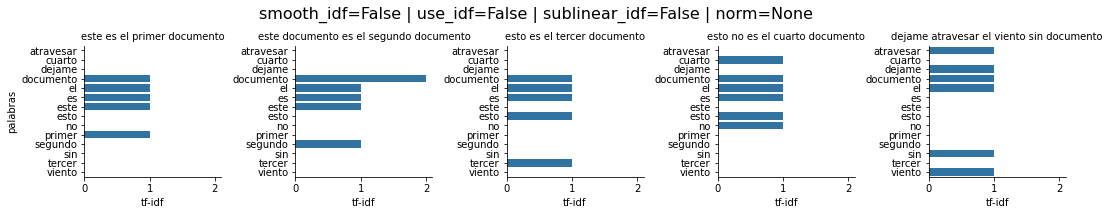

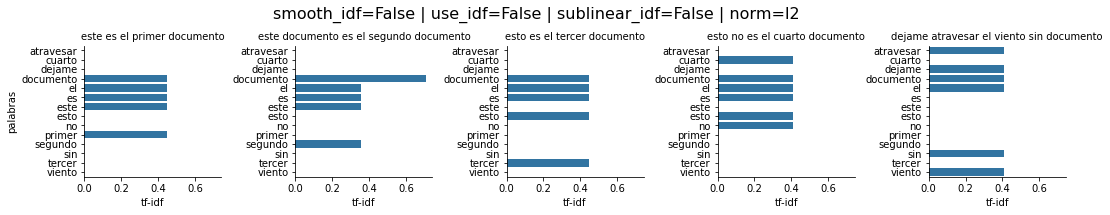

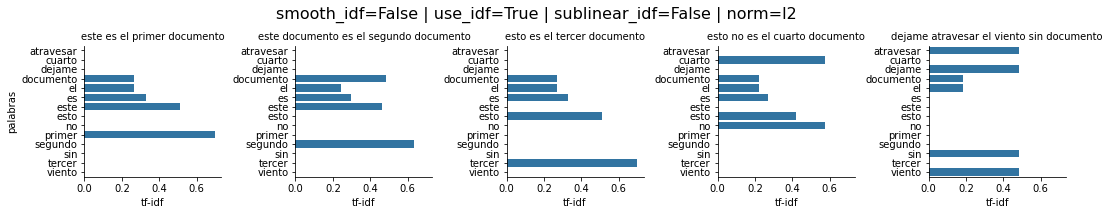

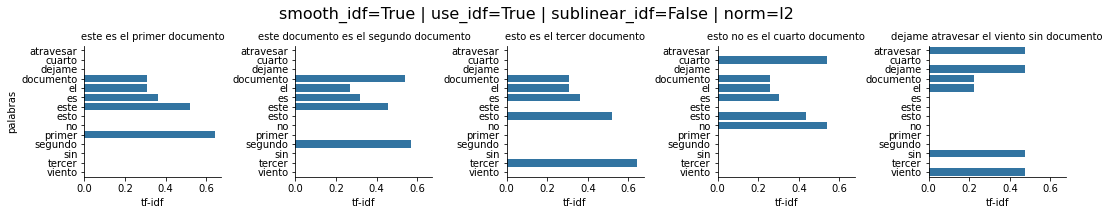

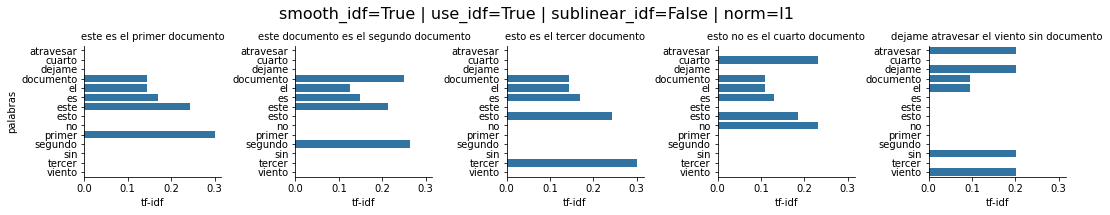

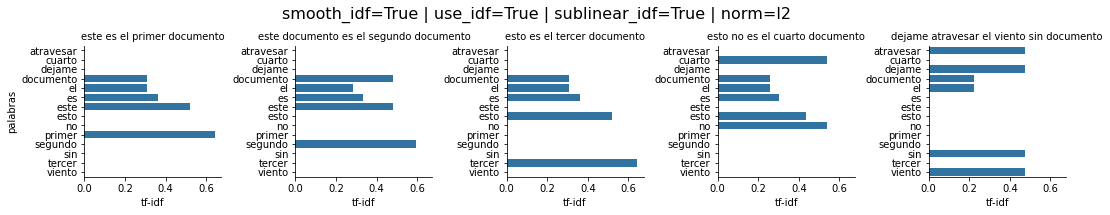

In [45]:
for name, data in tfidf_compare:
    _data = (
        data
        .reset_index()
        .melt(id_vars=['index'])
        .rename(columns={'index':'documentos','variable':'palabras','value':'tf-idf'})
        .sort_values(by=['palabras'],ascending=[True])
    )
    fig = plt.Figure(figsize=(10,10))
    g = sns.FacetGrid(_data, col='documentos', sharey=False, height=3)
    g.map(sns.barplot, 'tf-idf', 'palabras')
    g.set_titles(col_template='{col_name}')
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(name.replace('|',' | '), fontsize=16)
    plt.show()

## 5. Otros parámetros

Opciones de cálculo:

In [46]:
from itertools import product

smooth_idf = [True, False]
use_idf = [True, False]
sublinear = [True, False]
norm = ['l2','l1',None]

pd.DataFrame(list(product(smooth_idf,use_idf,sublinear,norm)), columns=['smooth_idf','use_idf','sublinear_idf','norm'])

,smooth_idf,use_idf,sublinear_idf,norm
0,True,True,True,l2
1,True,True,True,l1
2,True,True,True,None
3,True,True,False,l2
4,True,True,False,l1
5,True,True,False,None
6,True,False,True,l2
7,True,False,True,l1
8,True,False,True,None
9,True,False,False,l2


- `smooth_idf:` suma 1 al numerador y al denominador en el idf. Default=True.
- `use_idf:` utiliza idf. Default=True.
- `sublinear:`reemplaza tf con 1+log(tf). Desault=False.
- `norm`: determina normalización. l1: cada componente del vector de un documento se divide por la suma de todas las componentes que lo conforman. l2: el resultado de tf\*idf se normaliza de forma Euclideana. Esto significa que cada componente del vector de un documento se divide por la raíz cuadrada de la suma de los cuadrados de todas las componentes que consituyen el vector.
    
    Las normalizaciones en fórmulas:
    
$$
v_{norm1} = \frac{v}{||v||_1} = \frac{v}{v_1+v_2+v_3+...+v_n}\\
v_{norm2} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v_1^2+v_2^2+v_3^2+...+v_n^2}}
$$
    
    
[Aquí](https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms) se puede leer un poco más sobre normalizaciones.

## 6. Funciones relacionadas

`sklearn` posee dos clases para calcular **tf-idf**: `TfidfVectorizer` y `TfidfTransformer`.

La diferencia entre ambas es que `TfidfVectorizer` puede aplicarse directamente sobre los datos. En cambio, para poder aplicar `TfidfTransformer` es necesario, primero, aplicar `CountVectorizer`. 

[Fuente](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

Aquí estoy reutilizando las medidas de tf-idf obtenidas con `TfidfVectorizer`.

In [47]:
tfidf_sklearn

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.540959,0.270480,0.319794,0.457962,0.000000,0.000000,0.000000,0.567632,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


Y aquí, retomo las frecuencias calculadas con `CountVectorizer` y les aplico la transformación de `TfidfTransformer`.

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
X_tfidf_transform = transformer.fit_transform(X_cv)
pd.DataFrame(m.toarray(), columns=count_vectorizer.get_feature_names(), index=corpus)

,atravesar,cuarto,dejame,documento,el,es,este,esto,no,primer,segundo,sin,tercer,viento
este es el primer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.518366,0.000000,0.000000,0.642502,0.000000,0.000000,0.000000,0.000000
este documento es el segundo documento,0.000000,0.000000,0.000000,0.540959,0.270480,0.319794,0.457962,0.000000,0.000000,0.000000,0.567632,0.000000,0.000000,0.000000
esto es el tercer documento,0.000000,0.000000,0.000000,0.306156,0.306156,0.361974,0.000000,0.518366,0.000000,0.000000,0.000000,0.000000,0.642502,0.000000
esto no es el cuarto documento,0.000000,0.540546,0.000000,0.257573,0.257573,0.304534,0.000000,0.436109,0.540546,0.000000,0.000000,0.000000,0.000000,0.000000
dejame atravesar el viento sin documento,0.473826,0.000000,0.473826,0.225781,0.225781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.473826,0.000000,0.473826


cuándo utilizar cada parametrización: [ML Wiki](http://mlwiki.org/index.php/TF-IDF)toarray